In [20]:
%reload_ext watermark
%watermark -v -m -p numpy,openpiv

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 8.4.0

numpy  : 1.23.1
openpiv: 0.24.4b0

Compiler    : GCC 4.8.5 20150623 (Red Hat 4.8.5-44)
OS          : Linux
Release     : 5.4.0-131-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [21]:
from openpiv import windef

import numpy as np
import os
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [22]:
settings = windef.PIVSettings()

# 'Data related settings'
# Folder with the images to process
# settings.filepath_images = '../data/'
# Folder for the outputs
settings.save_path = '../OpenPIV_results/'
# Root name of the output Folder for Result Files
settings.save_folder_suffix = 'Test_1'
# Format and Image Sequence
# settings.frame_pattern_a = 'karman_16Hz_000_A.jpg'
# settings.frame_pattern_b = 'karman_16Hz_000_B.jpg'

settings.filepath_images = '../test10/'
settings.frame_pattern_a = 'B001_1.tif'
settings.frame_pattern_b = 'B001_2.tif'

'Region of interest'
# (50,300,50,300) #Region of interest: (xmin,xmax,ymin,ymax) or 'full' for full image
settings.ROI = 'full'
# settings.ROI = (200,400,500,900)
# settings.ROI = (200,212,500,512)

# settings.deformation_method = 'symmetric' 
settings.deformation_method = 'second image'


settings.num_iterations = 1  # select the number of PIV passes

# add the interrogation window size for each pass. 
# For the moment, it should be a power of 2 
# settings.windowsizes=(64, 32, 16, 6)
# settings.overlap=(32, 16, 8, 3)

settings.windowsizes=(32,32)
settings.overlap=(16,16)

# settings.windowsizes = (128, 64, 32, 16, 8) # if longer than n iteration the rest is ignored
# The overlap of the interroagtion window for each pass.
# settings.overlap = (64, 32, 16, 8, 4) # This is 50% overlap


# Has to be a value with base two. In general window size/2 is a good choice.
# methode used for subpixel interpolation: 'gaussian','centroid','parabolic'
settings.subpixel_method = 'gaussian'

# order of the image interpolation for the window deformation
settings.interpolation_order = 3
settings.scaling_factor = 1  # scaling factor pixel/meter
settings.dt = 1  # time between to frames (in seconds)

# 'Signal to noise ratio options (only for the last pass)'
# It is possible to decide if the S/N should be computed (for the last pass) or not
# settings.extract_sig2noise = True  # 'True' or 'False' (only for the last pass)
settings.sig2noise_threshold = 1.25
# method used to calculate the signal to noise ratio 'peak2peak' or 'peak2mean'
settings.sig2noise_method = 'peak2peak'
# select the width of the masked to masked out pixels next to the main peak
settings.sig2noise_mask = 2
settings.sig2noise_validate = False

# If extract_sig2noise==False the values in the signal to noise ratio
# output column are set to NaN

# only effecting the first pass of the interrogation the following passes
# in the multipass will be validated

'Output options'
# Select if you want to save the plotted vectorfield: True or False
settings.save_plot = False
# Choose wether you want to see the vectorfield or not :True or False
settings.show_plot = False
settings.scale_plot = 100  # select a value to scale the quiver plot of the vectorfield
# run the script with the given settings



# 'Processing Parameters'
settings.correlation_method='circular'  # 'circular' or 'linear'
settings.normalized_correlation = False

# 'vector validation options'
# choose if you want to do validation of the first pass: True or False
settings.validation_first_pass = True


settings.filter_method = 'localmean'


settings.replace_vectors = True
# maximum iterations performed to replace the outliers
settings.max_filter_iteration = 4
settings.filter_kernel_size = 2  # kernel size for the localmean method



settings.MinMax_U_disp = (-10, 10)
settings.MinMax_V_disp = (-10, 10)

# The second filter is based on the global STD threshold
settings.std_threshold = 5  # threshold of the std validation

# The third filter is the median test (not normalized at the moment)
settings.median_threshold = 3  # threshold of the median validation
# On the last iteration, an additional validation can be done based on the S/N.
settings.median_size = 2 # defines the size of the local median, it'll be 3 x 3

# New settings for version 0.23.2c
settings.image_mask = False

# Image mask properties
settings.dynamic_masking_method = 'None'
settings.dynamic_masking_threshold = 0.1
settings.dynamic_masking_filter_size = 21



# Smoothing after the first pass
settings.smoothn = False #Enables smoothing of the displacemenet field
settings.smoothn_p = 0.5 # This is a smoothing parameter


settings.show_all_plots = False
settings.show_plot = True

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
../test10
B001_1.tif
True
[PosixPath('../test10/B001_1.tif')]


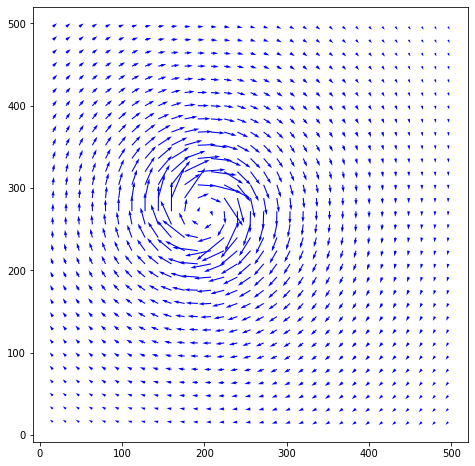

Image Pair 1
B001_1 B001_2


In [23]:
%time
windef.piv(settings)